# Importar librerias necesarias

In [4]:
import pandas as pd
import requests


# Importar pronostico de centrales

In [6]:
df = pd.read_parquet(r'/Users/maximilianocruz/Documents/GitHub/INF3813-1-Deep-learning-avanzado/data/pronostico_erv/limpieza.parquet')
df.rename(columns={'CODIGO':'id_infotecnica','ESTACION':'nombre_central'}, inplace=True)
df

,id_infotecnica,nombre_central,DATE_DESDE,DATE_HASTA,P50
0,223,eolica-punta-colorada,23-01-2020 11:00,23-01-2020 12:00,1.70
1,223,eolica-punta-colorada,23-01-2020 10:00,23-01-2020 11:00,0.89
2,223,eolica-punta-colorada,23-01-2020 09:00,23-01-2020 10:00,0.34
3,223,eolica-punta-colorada,23-01-2020 08:00,23-01-2020 09:00,0.21
4,223,eolica-punta-colorada,23-01-2020 07:00,23-01-2020 08:00,0.18
...,...,...,...,...,...
9710058,319,luz-del-norte,30-11-2019 23:00,01-12-2019 00:00,0.00
9710059,319,luz-del-norte,23-11-2019 07:00,23-11-2019 08:00,129.76
9710060,319,luz-del-norte,23-11-2019 08:00,23-11-2019 09:00,129.76
9710061,319,luz-del-norte,23-11-2019 09:00,23-11-2019 10:00,129.76


In [7]:
# Check and remove duplicates, keeping the last occurrence
df = df.drop_duplicates(subset=['id_infotecnica', 'DATE_DESDE'], keep='last').copy()

In [8]:
df.DATE_DESDE = df.DATE_DESDE.str.replace('/', '-').copy()  
df.DATE_DESDE = df.DATE_DESDE.str.replace('2121', '2021').copy()
df.DATE_DESDE = df.DATE_DESDE.str.replace('#', '').copy()
df

,id_infotecnica,nombre_central,DATE_DESDE,DATE_HASTA,P50
1,223,eolica-punta-colorada,23-01-2020 10:00,23-01-2020 11:00,0.89
2,223,eolica-punta-colorada,23-01-2020 09:00,23-01-2020 10:00,0.34
3,223,eolica-punta-colorada,23-01-2020 08:00,23-01-2020 09:00,0.21
12,247,solar-llano-de-llampos,15-01-2020 04:00,15-01-2020 05:00,0.00
15,247,solar-llano-de-llampos,15-01-2020 01:00,15-01-2020 02:00,0.00
...,...,...,...,...,...
9710058,319,luz-del-norte,30-11-2019 23:00,01-12-2019 00:00,0.00
9710059,319,luz-del-norte,23-11-2019 07:00,23-11-2019 08:00,129.76
9710060,319,luz-del-norte,23-11-2019 08:00,23-11-2019 09:00,129.76
9710061,319,luz-del-norte,23-11-2019 09:00,23-11-2019 10:00,129.76


In [9]:
df = df[df['id_infotecnica']!="None"].copy()
df.id_infotecnica = df.id_infotecnica.astype(int)

In [10]:
# First try with dd/mm/yyyy format
df['datetime'] = pd.to_datetime(df.DATE_DESDE, format="%d-%m-%Y %H:%M", errors='coerce')

# Fill NaT values with second format attempt
mask = df['datetime'].isna()
df.loc[mask, 'datetime'] = pd.to_datetime(df.loc[mask, 'DATE_DESDE'], format="%Y-%m-%d %H:%M", errors='coerce')



In [11]:
df.dropna(inplace=True)
df.sort_values(by='datetime', inplace=True)

In [12]:
df

,id_infotecnica,nombre_central,DATE_DESDE,DATE_HASTA,P50,datetime
2046893,248,solar-san-andres,23-08-2016 18:00,23-08-2016 19:00,14.60,2016-08-23 18:00:00
2046898,248,solar-san-andres,24-08-2016 13:00,24-08-2016 14:00,22.00,2016-08-24 13:00:00
2046897,248,solar-san-andres,24-08-2016 14:00,24-08-2016 15:00,22.00,2016-08-24 14:00:00
2046896,248,solar-san-andres,24-08-2016 15:00,24-08-2016 16:00,22.00,2016-08-24 15:00:00
2046895,248,solar-san-andres,24-08-2016 16:00,24-08-2016 17:00,22.00,2016-08-24 16:00:00
...,...,...,...,...,...,...
923422,332,parque-pampa-solar-norte,02-07-2022 15:00,02-07-2022 16:00,40.21,2022-07-02 15:00:00
23281,1862,pfv-inca-de-oro-en,02-07-2022 15:00,02-07-2022 16:00,132.83,2022-07-02 15:00:00
923421,332,parque-pampa-solar-norte,02-07-2022 16:00,02-07-2022 17:00,33.80,2022-07-02 16:00:00
23280,1862,pfv-inca-de-oro-en,02-07-2022 16:00,02-07-2022 17:00,104.96,2022-07-02 16:00:00


In [13]:
rename_cols = {'P50':'pronostico'}
df = df.rename(columns=rename_cols)
df.drop(columns=['DATE_DESDE','DATE_HASTA'], inplace=True)
df.head()

,id_infotecnica,nombre_central,pronostico,datetime
2046893,248,solar-san-andres,14.6,2016-08-23 18:00:00
2046898,248,solar-san-andres,22.0,2016-08-24 13:00:00
2046897,248,solar-san-andres,22.0,2016-08-24 14:00:00
2046896,248,solar-san-andres,22.0,2016-08-24 15:00:00
2046895,248,solar-san-andres,22.0,2016-08-24 16:00:00


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1789186 entries, 2046893 to 252463
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id_infotecnica  int64         
 1   nombre_central  object        
 2   pronostico      float64       
 3   datetime        datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 68.3+ MB


In [15]:
df[df['id_infotecnica']==1704].describe()


,id_infotecnica,pronostico,datetime
count,5418.0,5418.000000,5418
mean,1704.0,15.242342,2021-10-17 07:46:36.677741056
min,1704.0,0.000000,2021-02-12 12:00:00
25%,1704.0,0.000000,2021-06-04 00:15:00
50%,1704.0,0.000000,2021-10-12 20:30:00
75%,1704.0,17.517500,2022-03-07 16:45:00
max,1704.0,306.130000,2022-06-02 11:00:00
std,0.0,29.202761,NaN


# Importar informacion de Centrales

In [16]:
centrales = requests.get('https://api-infotecnica.coordinador.cl/v1/centrales-sin-filtrar/extended/?format=json')
data = centrales.json()
df_sen = pd.DataFrame(data)
df_sen = df_sen[['id','nombre','tipo_central_nombre','region_nombre','latitud','longitud','potencia_maxima']]
df_sen.rename(columns={'id':'id_infotecnica'}, inplace=True)
df_sen.head()

,id_infotecnica,nombre,tipo_central_nombre,region_nombre,latitud,longitud,potencia_maxima
0,110,TER CENIZAS,Termoeléctricas,Atacama,-27.484321,-70.391944,15.2545
1,145,PE MONTE REDONDO,Eólicas,Coquimbo,-31.077327,-71.657829,48.0000
2,221,PMGD HP MUCHI,Hidroeléctricas,Los Ríos,-40.316774,-72.227259,1.0000
3,236,TER CAMPICHE,Termoeléctricas,Valparaíso,-32.748294,-71.483299,269.6600
4,260,TER BOCAMINA II [No_Mostrar],Termoeléctricas,Biobío,-37.021485,-73.167313,349.5500


In [18]:
df_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_infotecnica       1275 non-null   int64  
 1   nombre               1275 non-null   object 
 2   tipo_central_nombre  1275 non-null   object 
 3   region_nombre        1193 non-null   object 
 4   latitud              1205 non-null   float64
 5   longitud             1205 non-null   float64
 6   potencia_maxima      1234 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 69.9+ KB


# Merge dataframes pronosticos e informacion centrales

In [17]:
df_merged = pd.merge(df, df_sen, on='id_infotecnica', how='left')

df_merged.head()


,id_infotecnica,nombre_central,pronostico,datetime,nombre,tipo_central_nombre,region_nombre,latitud,longitud,potencia_maxima
0,248,solar-san-andres,14.6,2016-08-23 18:00:00,PFV SAN ANDRES,Solares,Atacama,-27.254224,-70.111221,50.6
1,248,solar-san-andres,22.0,2016-08-24 13:00:00,PFV SAN ANDRES,Solares,Atacama,-27.254224,-70.111221,50.6
2,248,solar-san-andres,22.0,2016-08-24 14:00:00,PFV SAN ANDRES,Solares,Atacama,-27.254224,-70.111221,50.6
3,248,solar-san-andres,22.0,2016-08-24 15:00:00,PFV SAN ANDRES,Solares,Atacama,-27.254224,-70.111221,50.6
4,248,solar-san-andres,22.0,2016-08-24 16:00:00,PFV SAN ANDRES,Solares,Atacama,-27.254224,-70.111221,50.6


In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789186 entries, 0 to 1789185
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id_infotecnica       int64         
 1   nombre_central       object        
 2   pronostico           float64       
 3   datetime             datetime64[ns]
 4   nombre               object        
 5   tipo_central_nombre  object        
 6   region_nombre        object        
 7   latitud              float64       
 8   longitud             float64       
 9   potencia_maxima      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 136.5+ MB


In [19]:
# Check for duplicates in id_infotecnica and datetime columns
df_merged[df_merged.duplicated(['id_infotecnica', 'datetime'], keep=False)]


,id_infotecnica,nombre_central,pronostico,datetime,nombre,tipo_central_nombre,region_nombre,latitud,longitud,potencia_maxima
398,318,eolica-los-cururos,1.03,2016-09-18 03:00:00,PE LOS CURUROS,Eólicas,Coquimbo,-31.029949,-71.657108,109.4
399,318,eolica-los-cururos,0.51,2016-09-18 03:00:00,PE LOS CURUROS,Eólicas,Coquimbo,-31.029949,-71.657108,109.4
403,318,eolica-los-cururos,0.46,2016-09-18 04:00:00,PE LOS CURUROS,Eólicas,Coquimbo,-31.029949,-71.657108,109.4
404,318,eolica-los-cururos,0.48,2016-09-18 04:00:00,PE LOS CURUROS,Eólicas,Coquimbo,-31.029949,-71.657108,109.4
405,318,eolica-los-cururos,0.08,2016-09-18 05:00:00,PE LOS CURUROS,Eólicas,Coquimbo,-31.029949,-71.657108,109.4
...,...,...,...,...,...,...,...,...,...,...
1285999,649,csp-cerro-dominador-en,26.00,2021-04-20 06:00:00,CSP CERRO DOMINADOR,Termoeléctricas,Antofagasta,-22.776312,-69.480543,114.4
1286292,649,csp-cerro-dominador-en,80.00,2021-04-20 11:00:00,CSP CERRO DOMINADOR,Termoeléctricas,Antofagasta,-22.776312,-69.480543,114.4
1286332,649,csp-cerro-dominador-en,80.00,2021-04-20 11:00:00,CSP CERRO DOMINADOR,Termoeléctricas,Antofagasta,-22.776312,-69.480543,114.4
1785952,649,csp-cerro-dominador-en,7.63,2022-06-08 07:00:00,CSP CERRO DOMINADOR,Termoeléctricas,Antofagasta,-22.776312,-69.480543,114.4


In [21]:
df_merged.shape 

(1789186, 10)

# Exportar df_merged

In [22]:
df_merged.to_csv(r'/Users/maximilianocruz/Documents/GitHub/INF3813-1-Deep-learning-avanzado/data/pronostico_erv/data_erv.csv', index=False)

# Agrupar por fecha, tipo central y region

In [23]:
df_grouped = df_merged.groupby(['datetime','tipo_central_nombre','region_nombre']).agg({'pronostico':'sum'}).reset_index()
df_grouped.head()



,datetime,tipo_central_nombre,region_nombre,pronostico
0,2016-08-23 18:00:00,Solares,Atacama,14.6
1,2016-08-24 13:00:00,Solares,Atacama,22.0
2,2016-08-24 14:00:00,Solares,Atacama,22.0
3,2016-08-24 15:00:00,Solares,Atacama,22.0
4,2016-08-24 16:00:00,Solares,Atacama,22.0


In [24]:
df_grouped

,datetime,tipo_central_nombre,region_nombre,pronostico
0,2016-08-23 18:00:00,Solares,Atacama,14.60
1,2016-08-24 13:00:00,Solares,Atacama,22.00
2,2016-08-24 14:00:00,Solares,Atacama,22.00
3,2016-08-24 15:00:00,Solares,Atacama,22.00
4,2016-08-24 16:00:00,Solares,Atacama,22.00
...,...,...,...,...
526094,2022-07-02 15:00:00,Solares,Antofagasta,40.21
526095,2022-07-02 15:00:00,Solares,Atacama,132.83
526096,2022-07-02 16:00:00,Solares,Antofagasta,33.80
526097,2022-07-02 16:00:00,Solares,Atacama,104.96


In [25]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526099 entries, 0 to 526098
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datetime             526099 non-null  datetime64[ns]
 1   tipo_central_nombre  526099 non-null  object        
 2   region_nombre        526099 non-null  object        
 3   pronostico           526099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 16.1+ MB


In [27]:
print('Cantidad de Central por Tipo: \n', df_grouped['tipo_central_nombre'].value_counts())
print('\n Cantidad de Centrales por Region: \n', df_grouped['region_nombre'].value_counts())

Cantidad de Central por Tipo: 
 tipo_central_nombre
Eólicas            312537
Solares            208589
Termoeléctricas      4973
Name: count, dtype: int64

 Cantidad de Centrales por Region: 
 region_nombre
Antofagasta      93949
Atacama          89926
Coquimbo         81416
Los Lagos        45661
Biobío           45057
Araucanía        43902
O’Higgins        43670
Metropolitana    31883
Tarapacá         28766
Valparaíso       21582
Maule              287
Name: count, dtype: int64


# Exportar df_grouped

In [28]:
df_grouped.to_csv(r'/Users/maximilianocruz/Documents/GitHub/INF3813-1-Deep-learning-avanzado/data/pronostico_erv/data_erv_aggregated.csv', index=False)

# Graficar cantidad de centrales por region y tipo

In [31]:
# Crear un nuevo DataFrame que incluya solo el año y semestre sin modificar 'df_grouped'
df_temp = df_grouped.copy()
df_temp['anio_semestre'] = df_temp['datetime'].dt.year.astype(str) + '-S' + df_temp['datetime'].dt.quarter.apply(lambda x: '1' if x <= 2 else '2')

# Agrupar por 'region_nombre', 'tipo_central_nombre' y 'anio_semestre' para contar la cantidad de centrales
tabla_centrales_semestre = df_temp.groupby(['region_nombre', 'tipo_central_nombre', 'anio_semestre']).size().unstack(fill_value=0)

# Mostrar el nuevo DataFrame resultante
tabla_centrales_semestre

anio_semestre                      2016-S2  2017-S1  2017-S2  2018-S1  \
region_nombre tipo_central_nombre                                       
Antofagasta   Eólicas                 2055     4302     3715     4249   
              Solares                 1952     4198     4382     4273   
              Termoeléctricas            0        0        0        0   
Araucanía     Eólicas                 2057     3633     4415     4259   
Atacama       Eólicas                 2292     4344     4415     4344   
              Solares                 2454     4331     4371     4344   
Biobío        Eólicas                 2303     4344     4415     4344   
Coquimbo      Eólicas                 2616     4344     4415     4344   
              Solares                 1491     3190     3394     3617   
Los Lagos     Eólicas                 2458     4344     4415     4344   
Maule         Solares                    0        0        0        0   
Metropolitana Solares                    0     1594     2485     3284   
O’Higgins     Eólicas                 2292     4344     4415     4344   
Tarapacá      Solares                    0        0        0      287   
Valparaíso    Solares                    0        0     2448     2382   

anio_semestre                      2018-S2  2019-S1  2019-S2  2020-S1  \
region_nombre tipo_central_nombre                                       
Antofagasta   Eólicas                 4395     4321     4291     2117   
              Solares                 4415     4343     4346     2247   
              Termoeléctricas            0        0        0        0   
Araucanía     Eólicas                 4343     4246     4118     2224   
Atacama       Eólicas                 4415     4344     4305     2246   
              Solares                 4416     4344     4414     2253   
Biobío        Eólicas                 4415     4344     4325     2248   
Coquimbo      Eólicas                 4415     4344     4380     2250   
              Solares                 3524     3295     2925     1772   
Los Lagos     Eólicas                 4415     4344     4330     2217   
Maule         Solares                    0        0        0        0   
Metropolitana Solares                 3579     3522     3440     2005   
O’Higgins     Eólicas                 4406     4344     4280     2041   
Tarapacá      Solares                 3958     3978     3998     2215   
Valparaíso    Solares                 2460     2463     2398     1505   

anio_semestre                      2020-S2  2021-S1  2021-S2  2022-S1  2022-S2  
region_nombre tipo_central_nombre                                               
Antofagasta   Eólicas                 2969     4277     3704     3489       23  
              Solares                 3569     4344     3713     3275       12  
              Termoeléctricas            0      951     1840     2160       22  
Araucanía     Eólicas                 2991     4324     3710     3551       31  
Atacama       Eólicas                 2991     4341     3656     2870        0  
              Solares                 3391     4344     3710     2978       13  
Biobío        Eólicas                 3237     4339     3711     3032        0  
Coquimbo      Eólicas                 3693     4344     3713     2919        0  
              Solares                 2651     3831     3183     2766        0  
Los Lagos     Eólicas                 3464     4256     3584     3459       31  
Maule         Solares                    0        0        0      287        0  
Metropolitana Solares                 2944     3646     2802     2582        0  
O’Higgins     Eólicas                 3175     3842     3448     2739        0  
Tarapacá      Solares                 3320     4241     3604     3153       12  
Valparaíso    Solares                 2047     2657     1619     1603        0

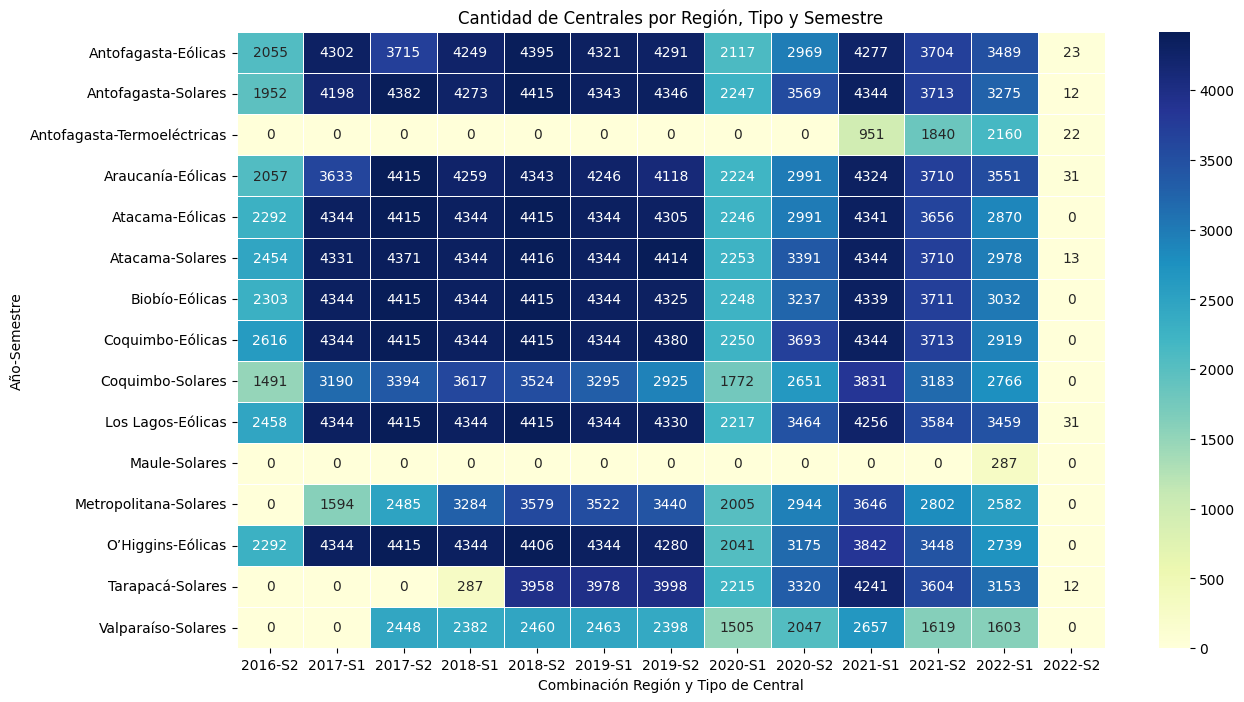

In [45]:
# Agrupar y contar la cantidad de centrales por región, tipo y semestre
df_heatmap_count = df_temp.groupby(['region_nombre', 'tipo_central_nombre', 'anio_semestre']).size().unstack(fill_value=0)

# Graficar el heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_heatmap_count, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Cantidad de Centrales por Región, Tipo y Semestre')
plt.xlabel('Combinación Región y Tipo de Central')
plt.ylabel('Año-Semestre')
plt.show()

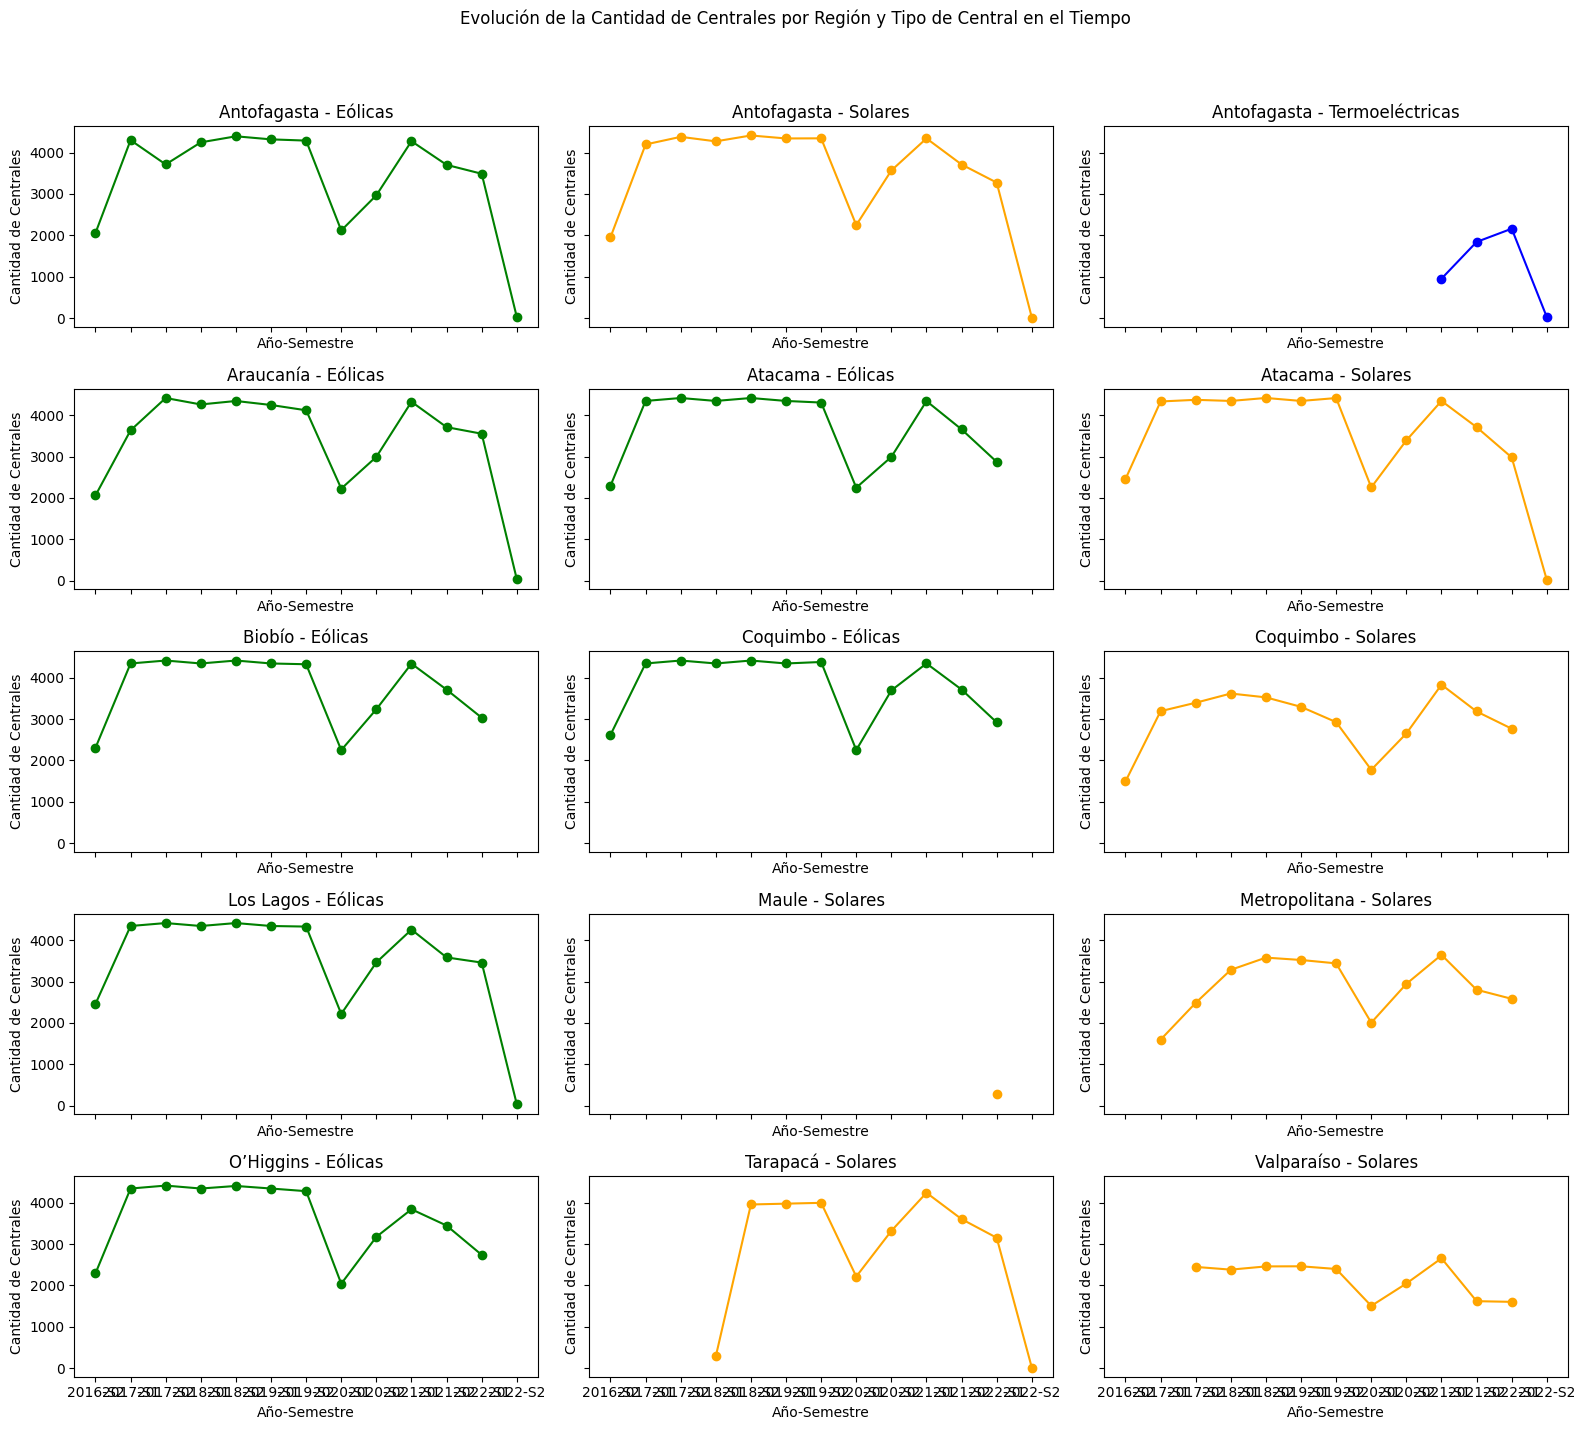

In [47]:
# Definir colores para cada tipo de central
colores_tipo = {
    'Solares': 'orange',
    'Eólicas': 'green',
    'Termoeléctricas': 'blue'
}

# Obtener la cantidad única de combinaciones para definir el tamaño de la cuadrícula
unique_combinations = df_temp.groupby(['region_nombre', 'tipo_central_nombre']).ngroups
cols = 3  # Ajusta el número de columnas si es necesario
rows = (unique_combinations // cols) + (unique_combinations % cols > 0)

# Configuración de gráficos de líneas pequeños (small multiples)
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 3), sharex=True, sharey=True)
fig.suptitle('Evolución de la Cantidad de Centrales por Región y Tipo de Central en el Tiempo')

# Iterar sobre cada combinación de región y tipo de central para crear gráficos individuales
for (region_tipo, data), ax in zip(df_temp.groupby(['region_nombre', 'tipo_central_nombre']), axs.flatten()):
    # Agrupar datos por semestre y contar la cantidad de ocurrencias
    data_semestre_count = data.groupby('anio_semestre').size()
    
    # Obtener el color del tipo de central
    color = colores_tipo.get(region_tipo[1], 'black')  # Usa negro como color predeterminado si el tipo no está en el diccionario
    
    # Graficar la línea con el color específico
    ax.plot(data_semestre_count.index, data_semestre_count.values, marker='o', color=color)
    ax.set_title(f"{region_tipo[0]} - {region_tipo[1]}")
    ax.set_xlabel('Año-Semestre')
    ax.set_ylabel('Cantidad de Centrales')
    
    # Desactivar la cuadrícula
    ax.grid(False)

# Ocultar subplots vacíos
for ax in axs.flatten()[unique_combinations:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Graficar pronosticos de centrales por region y tipo

In [39]:
# Agrupar por 'region_nombre', 'tipo_central_nombre' y 'anio_semestre' y sumar los valores de 'pronostico'
tabla_suma_pronostico_semestre = df_temp.groupby(['region_nombre', 'tipo_central_nombre', 'anio_semestre'])['pronostico'].sum().unstack(fill_value=0)

# Mostrar la nueva tabla
tabla_suma_pronostico_semestre

anio_semestre                        2016-S2    2017-S1    2017-S2    2018-S1  \
region_nombre tipo_central_nombre                                               
Antofagasta   Eólicas               24876.00   63519.97   37551.66   48771.74   
              Solares               78661.55  126449.79  273052.10  245980.15   
              Termoeléctricas           0.00       0.00       0.00       0.00   
Araucanía     Eólicas               23312.87   37074.86   56335.27   55333.73   
Atacama       Eólicas               34500.53  119451.95  160878.57  120059.04   
              Solares              189720.30  370953.43  541868.28  531618.80   
Biobío        Eólicas               21324.95   31997.29   45638.62   39754.90   
Coquimbo      Eólicas              109550.44  133036.81  337815.20  271550.75   
              Solares                 990.94    1497.05    7530.51   70336.90   
Los Lagos     Eólicas               16341.02   48194.17   57268.33   42727.47   
Maule         Solares                   0.00       0.00       0.00       0.00   
Metropolitana Solares                   0.00   29736.67   56361.94   98670.64   
O’Higgins     Eólicas                4046.67    5269.38    7002.03    5583.40   
Tarapacá      Solares                   0.00       0.00       0.00    1662.13   
Valparaíso    Solares                   0.00       0.00   24592.27   16766.97   

anio_semestre                        2018-S2    2019-S1    2019-S2    2020-S1  \
region_nombre tipo_central_nombre                                               
Antofagasta   Eólicas              167592.75  187773.96  203728.46  207473.24   
              Solares              652807.83  596833.32  572649.20  314643.70   
              Termoeléctricas           0.00       0.00       0.00       0.00   
Araucanía     Eólicas               43740.25   67175.23  106909.21  212780.36   
Atacama       Eólicas              276853.74  167637.63  362172.12  306250.10   
              Solares              613444.82  564379.92  606125.78  318569.19   
Biobío        Eólicas               39026.46   47353.13   50869.14   53546.56   
Coquimbo      Eólicas              386549.14  251203.66  495567.39  299021.90   
              Solares               81670.73   79181.02   87481.73   38829.15   
Los Lagos     Eólicas               48930.60   34072.40   78140.88  128895.62   
Maule         Solares                   0.00       0.00       0.00       0.00   
Metropolitana Solares              132792.69  118436.19  137767.20   69108.84   
O’Higgins     Eólicas                6576.63    5056.60    6913.08    6351.16   
Tarapacá      Solares               35309.74   65638.00  110205.98   84892.21   
Valparaíso    Solares               17265.66   17144.67   18336.26    8969.31   

anio_semestre                            2020-S2        2021-S1       2021-S2  \
region_nombre tipo_central_nombre                                               
Antofagasta   Eólicas              293854.010000  389617.704500  5.703964e+05   
              Solares              648201.770274  952189.152780  1.012576e+06   
              Termoeléctricas           0.000000   59572.000000  9.965513e+04   
Araucanía     Eólicas              318655.370000  623606.780000  6.479271e+05   
Atacama       Eólicas              646359.040000  764286.510000  8.494039e+05   
              Solares              562090.951219  747755.400730  7.838214e+05   
Biobío        Eólicas               75632.170000  117226.890000  1.898157e+05   
Coquimbo      Eólicas              674859.170000  554347.771871  5.748420e+05   
              Solares               62675.610000  128013.780000  1.208381e+05   
Los Lagos     Eólicas              153877.510000  161960.960000  1.409063e+05   
Maule         Solares                   0.000000       0.000000  0.000000e+00   
Metropolitana Solares              108945.120000  140863.290000  1.043644e+05   
O’Higgins     Eólicas               11718.510000   33950.010000  5.800512e+04   
Tarapacá      Solares        

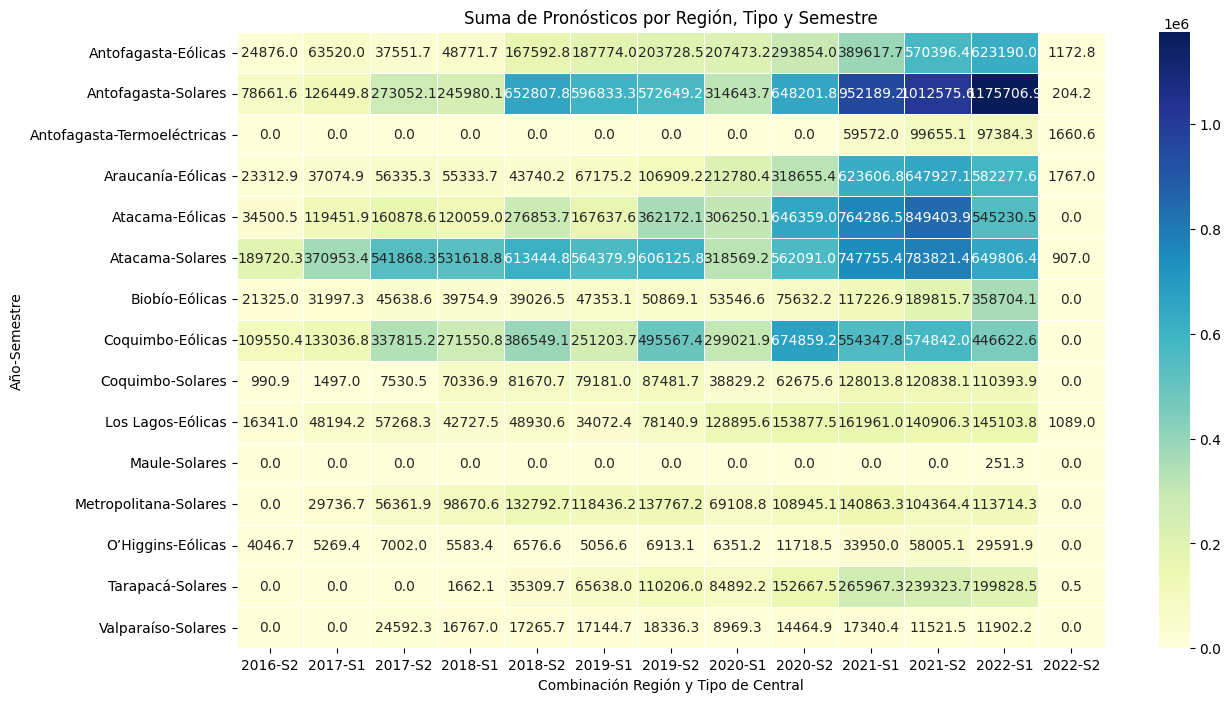

In [40]:
# Agrupar y sumar el pronóstico por región, tipo y semestre
df_heatmap = df_temp.groupby(['region_nombre', 'tipo_central_nombre', 'anio_semestre'])['pronostico'].sum().unstack(fill_value=0)

# Graficar el heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_heatmap, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Suma de Pronósticos por Región, Tipo y Semestre')
plt.xlabel('Combinación Región y Tipo de Central')
plt.ylabel('Año-Semestre')
plt.show()

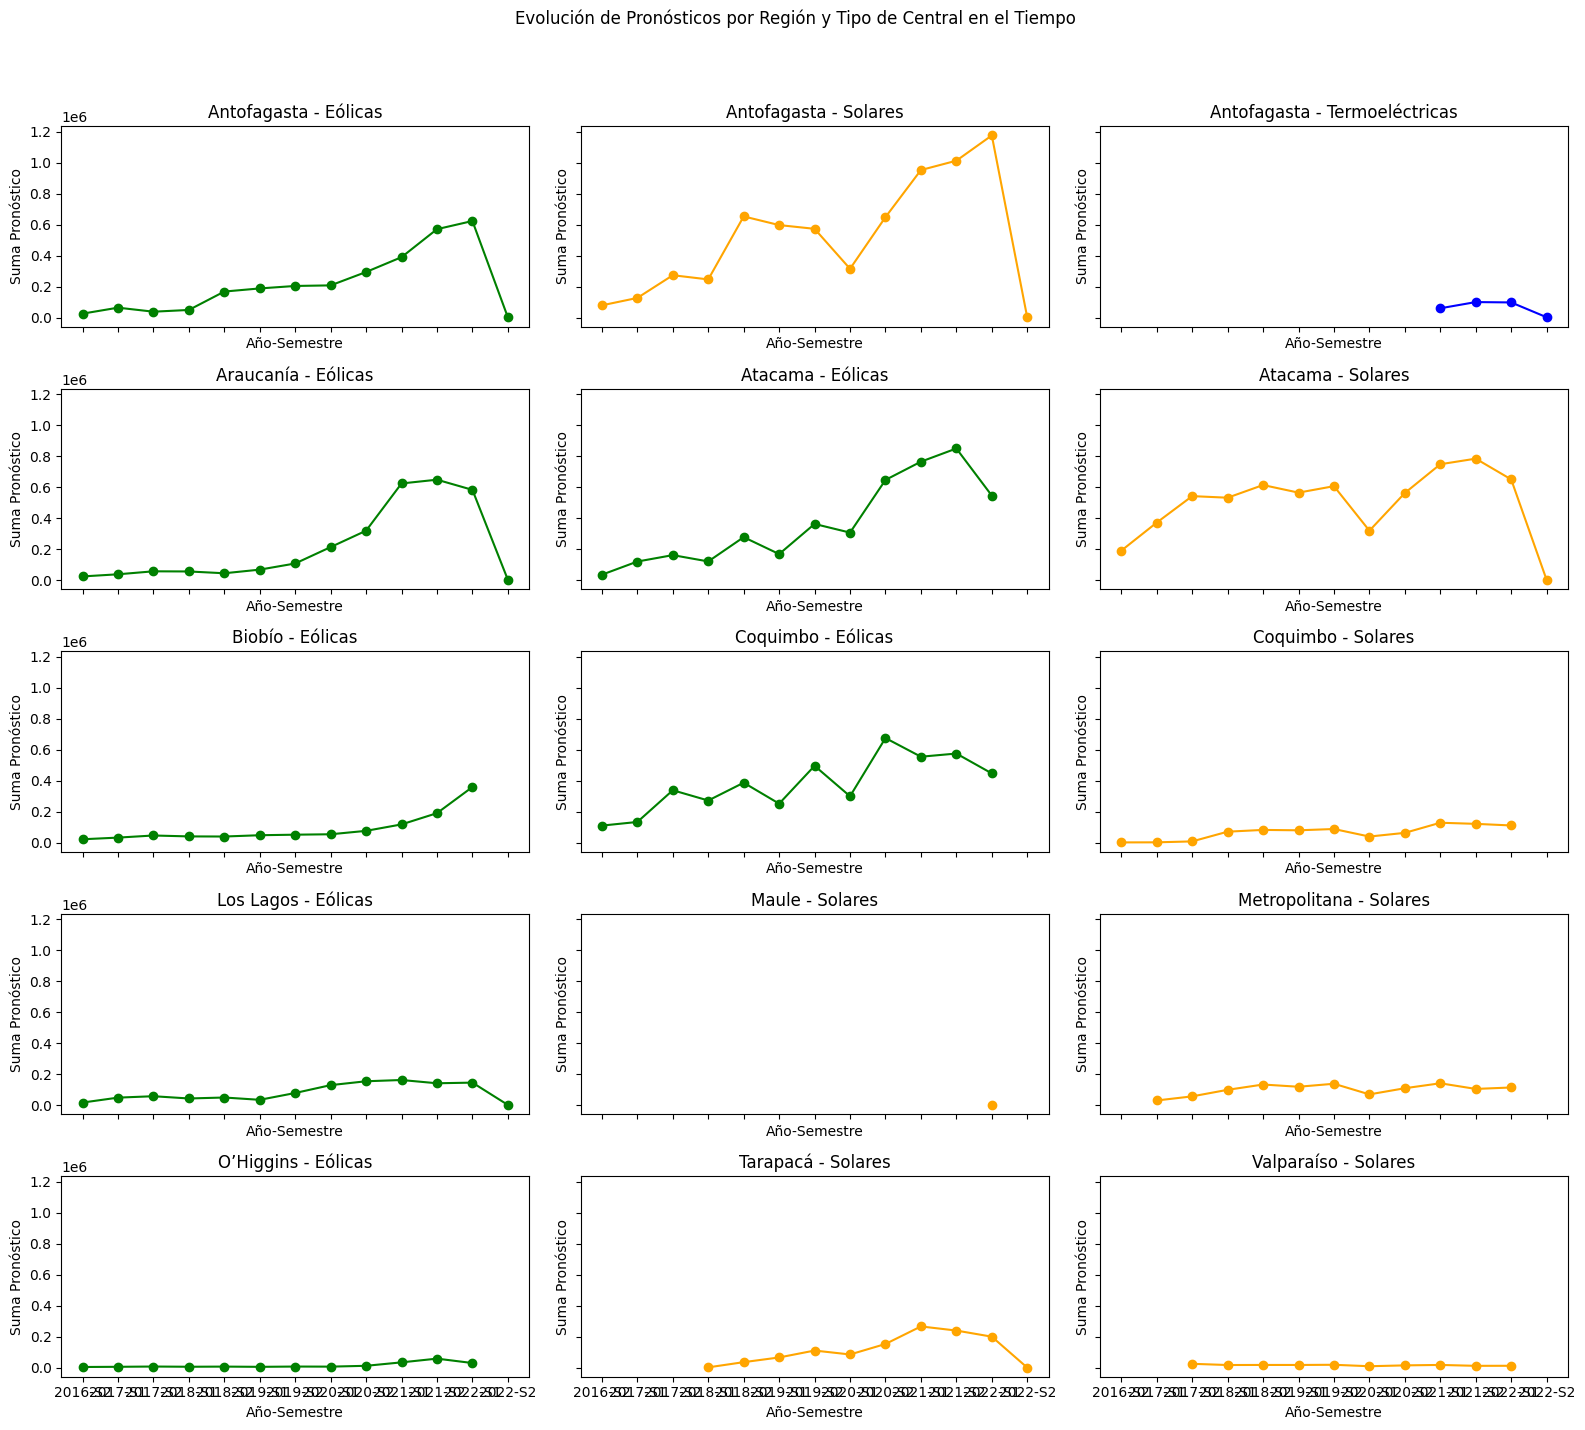

In [44]:
# Definir colores para cada tipo de central
colores_tipo = {
    'Solares': 'orange',
    'Eólicas': 'green',
    'Termoeléctricas': 'blue'
}

# Obtener la cantidad única de combinaciones para definir el tamaño de la cuadrícula
unique_combinations = df_temp.groupby(['region_nombre', 'tipo_central_nombre']).ngroups
cols = 3  # Ajusta el número de columnas si es necesario
rows = (unique_combinations // cols) + (unique_combinations % cols > 0)

# Configuración de gráficos de líneas pequeños (small multiples)
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 3), sharex=True, sharey=True)
fig.suptitle('Evolución de Pronósticos por Región y Tipo de Central en el Tiempo')

# Iterar sobre cada combinación de región y tipo de central para crear gráficos individuales
for (region_tipo, data), ax in zip(df_temp.groupby(['region_nombre', 'tipo_central_nombre']), axs.flatten()):
    # Agrupar datos por semestre y sumar
    data_semestre = data.groupby('anio_semestre')['pronostico'].sum()
    
    # Obtener el color del tipo de central
    color = colores_tipo.get(region_tipo[1], 'black')  # Usa negro como color predeterminado si el tipo no está en el diccionario
    
    # Graficar la línea con el color específico
    ax.plot(data_semestre.index, data_semestre.values, marker='o', color=color)
    ax.set_title(f"{region_tipo[0]} - {region_tipo[1]}")
    ax.set_xlabel('Año-Semestre')
    ax.set_ylabel('Suma Pronóstico')
    
    # Desactivar la cuadrícula
    ax.grid(False)

# Ocultar subplots vacíos
for ax in axs.flatten()[unique_combinations:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()